# ENSO example notebook

This notebook contains an example of data access on wilma (CNR) machine of ERA5 and evaluation of the NAO teleconnection (station based index) with aqua libraries and an example of the plotting routines.

In [25]:
import datetime
import sys
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from index import *
from plots import *
from tools import *

sys.path.insert(0, '../../')
from aqua import Reader

## Teleconnection and machine details configuration

Details such as teleconnection coordinates, folder input/output are obtained with functions collected in the `tools.py` file, that access details from a `yaml` file.

Machine is by default `wilma` and diagnostic `teleconnections` if not specified.
Note that `wilma` is the only machine that need to load the `yaml` file.
Details about the ENSO teleconnection can be accessed by specificing the teleconnection name as a string.

`config` and `namelist` contain now the details about the machine and the teleconnections diagnostic.

## ENSO with ERA5 data

In [28]:
machine   = 'levante'
diagname  = 'teleconnections'
telecname = 'ENSO'
exp = 'ERA5'

config   = load_config(machine)
namelist = load_namelist()

field = config[diagname][telecname][exp]['var']

In [29]:
configdir = '../../config/'

reader = Reader(model='ERA5',exp='era5',source='monthly_inst',configdir=configdir,regrid='r100')

In [30]:
data = reader.retrieve()
data

/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/intake_esm/utils.py:96: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(catalog_path, **csv_kwargs), catalog_path


<xarray.Dataset>
Dimensions:     (time: 516, values: 542080)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    lat         (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    lon         (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    valid_time  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/15)
    d2m         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    hcc         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    lcc         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    lsm         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    mcc         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    msl         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    ...          ...
    sp          (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    tas         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    tcw         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    u10         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    v10         (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    z           (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    institution:             European Centre for Medium-Range Weather Forecasts
    intake_esm_varname:      d2m\nhcc\nlcc\nlsm\nmcc\nmsl\nsd\nsiconc\nskt\ns...
    GRIB_subCentre:          0
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 2023-03-02T11:37 GRIB to CDM+CF via cfgrib-0.9.1...
    Conventions:             CF-1.7
    GRIB_edition:            1
    intake_esm_dataset_key:  128.0.avgua.surface.monthly

In [33]:
infile = data['tas']
infile = reader.regrid(infile)
infile

<xarray.DataArray 'tas' (time: 516, lat: 180, lon: 360)>
dask.array<reshape, shape=(516, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Attributes: (12/27)
    GRIB_paramId:                    167
    GRIB_dataType:                   an
    GRIB_numberOfPoints:             542080
    GRIB_typeOfLevel:                surface
    GRIB_stepUnits:                  1
    GRIB_stepType:                   avgua
    ...                              ...
    target_units:                    K
    factor:                          1.0
    offset:                          0
    src_units:                       K
    units_fixed:                     1
    regridded:                       1

In [44]:
enso = regional_mean_index(infile,namelist,telecname,months_window=1)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO Index, Nino 3.4'}, xlabel='time', ylabel='2 meter temperature [K]'>)

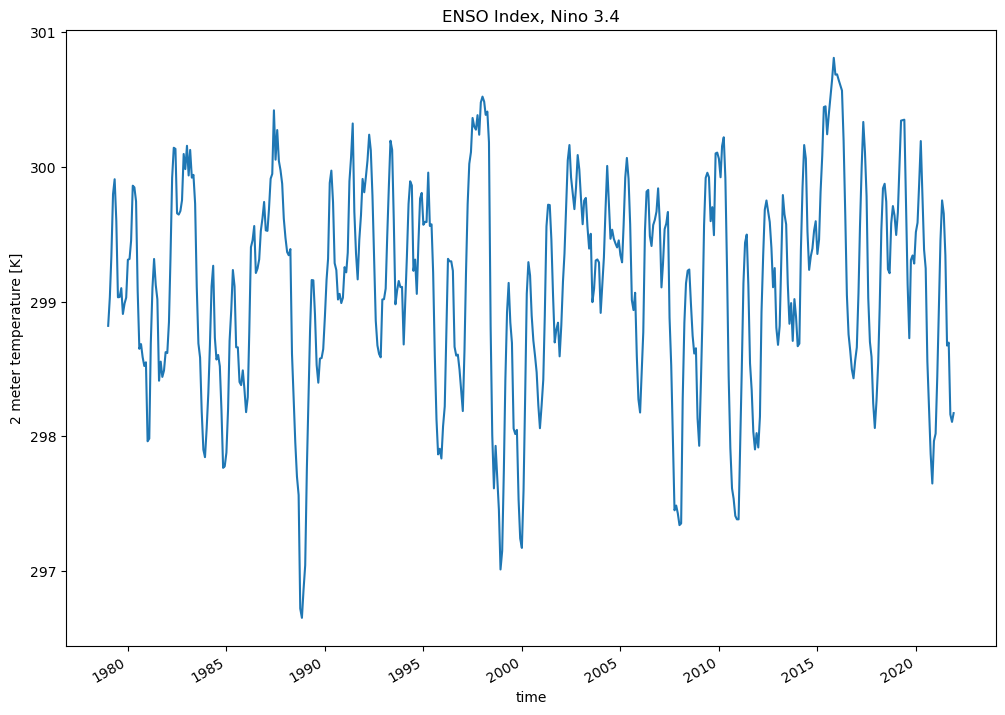

In [7]:
simple_plot(enso,title='ENSO Index, Nino 3.4',ylabel='2 meter temperature [K]',
            save=True,filename='enso_index.png',outputdir='img/')

## Correlation plot

To visualize the teleconnection on a 2D plot functions in the `plots.py` are introduced.
There is an option `plot=True` that creates a plot of the correlation. Additionally an xarray containing the result of the regression is returned.

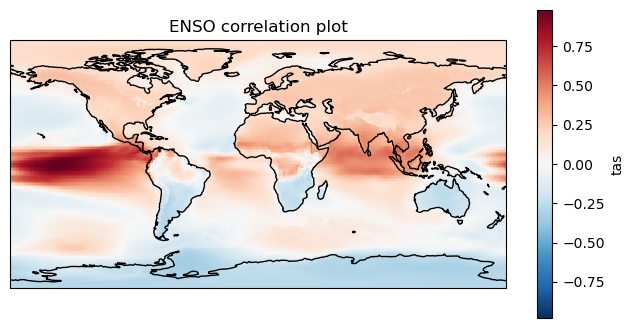

In [8]:
enso_cor = cor_plot(enso,infile,title='ENSO correlation plot',save=True,
                    filename='enso_cor.png',outputdir='img/')

## ENSO Nino3.4 anomalies

In [34]:
enso_an = regional_mean_anomalies(infile,namelist,telecname,months_window=1)

/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1372: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO Anomalies, Nino 3.4'}, xlabel='time', ylabel='2 meter temperature anomalies [K]'>)

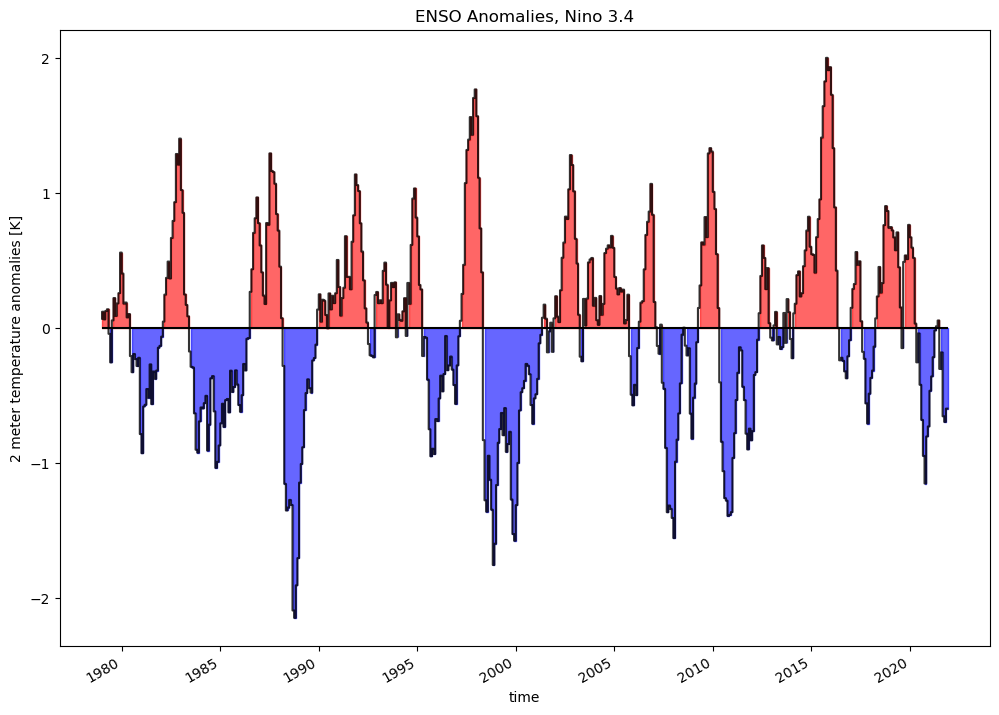

In [ ]:
index_plot(enso_an,title='ENSO Anomalies, Nino 3.4',ylabel='2 meter temperature anomalies [K]',
           save=True,filename='enso_an.png',outputdir='img/')

## NCAR comparison

In [21]:
ncar_path = 'data/nina34.anom.txt'
enso_ncar = np.genfromtxt(ncar_path,skip_header=3,skip_footer=4)

In [22]:
# If some missing value is remaining
for i in enso_ncar:
    for j in i:
        if j == -99.99:
            j = np.nan

In [23]:
year = enso_ncar[:,0]
month_data = enso_ncar[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='M',calendar='standard')
month_data = month_data.reshape(-1)
enso_ncar = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

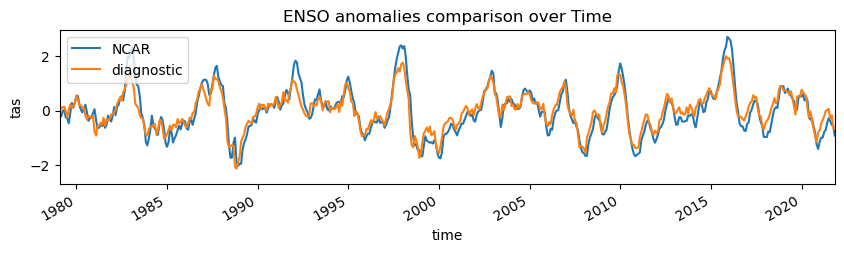

In [35]:
time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,2))
plt.plot(datetimes, enso_ncar.values,label='NCAR')

plt.xlim(datetime.datetime(1979, 1, 31, 0, 0),datetime.datetime(2021, 10, 31, 0, 0))
#plt.ylim(-5,+5)

enso_an.plot(label='diagnostic')
plt.legend()
plt.title('ENSO anomalies comparison over Time')
plt.show()

In [38]:
ncar_path = 'data/nina34.txt'
enso_ncar = np.genfromtxt(ncar_path,skip_header=3,skip_footer=4)

In [41]:
year = enso_ncar[:,0]
month_data = enso_ncar[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='M',calendar='standard')
month_data = month_data.reshape(-1)
enso_ncar = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

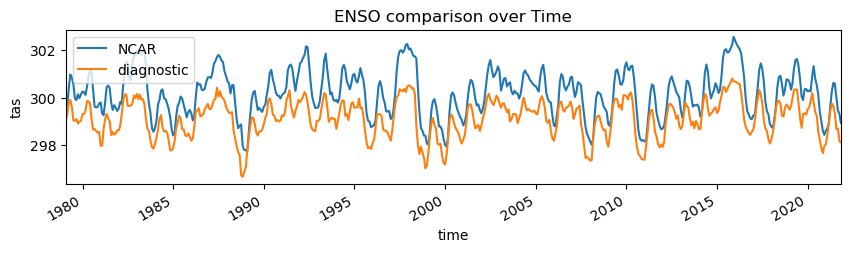

In [54]:
time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,2))
plt.plot(datetimes, enso_ncar.values+273.15,label='NCAR')

plt.xlim(datetime.datetime(1979, 1, 31, 0, 0),datetime.datetime(2021, 10, 31, 0, 0))

enso.plot(label='diagnostic')
plt.legend()
plt.title('ENSO comparison over Time')
plt.show()

In [52]:
mean1 = enso.mean()
mean2 = enso_ncar.mean()
print(mean1.values,(mean2+273.15).values)
print((mean1-(mean2+273.15)).values)

299.12610107077126 300.03321917808216
-0.9071181073109074
